This notebook was created as part of coursework in University Pompeu Fabra's Machine Learning Course (MIIS)

The assignment explores the theory behind the effect of varying hyperparameters using the Support Vector Machine(SVM) classification learning algorithm. It also seeks to benchmark the these parameters inorder to minimize the cross-validation error.

In this notebook, we first run an SVM from Python's library to train a classifier using a radial basis function as a kernel function. Next, cross-validation is applied to evaluate different combinations of values
of the model parameters (box constraint C and kernel parameter γ).

Through benchmarking, we can determine how sensitive the cross-validation error to changes in C and γ and answer the question of how to choose the combination of C and γ that minimizes the cross-validation error. To finish, we train
the SVM on the entire dataset and report the total classification error.


In [23]:
#import libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.svm import SVC  
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [34]:
# Pick a classification dataset, load the file and read the labels in Y and data in X
#the dataset used in this notebook is the normalized Diabetes dataset 
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale

x, y = load_svmlight_file('/users/your_username/location_of_dataset/diabetes_scale.svm')

print(x)

  (0, 0)	-0.294118
  (0, 1)	0.487437
  (0, 2)	0.180328
  (0, 3)	-0.292929
  (0, 4)	-1.0
  (0, 5)	0.00149028
  (0, 6)	-0.53117
  (0, 7)	-0.0333333
  (1, 0)	-0.882353
  (1, 1)	-0.145729
  (1, 2)	0.0819672
  (1, 3)	-0.414141
  (1, 4)	-1.0
  (1, 5)	-0.207153
  (1, 6)	-0.766866
  (1, 7)	-0.666667
  (2, 0)	-0.0588235
  (2, 1)	0.839196
  (2, 2)	0.0491803
  (2, 3)	-1.0
  (2, 4)	-1.0
  (2, 5)	-0.305514
  (2, 6)	-0.492741
  (2, 7)	-0.633333
  (3, 0)	-0.882353
  :	:
  (764, 7)	-0.8
  (765, 0)	-0.411765
  (765, 1)	0.21608
  (765, 2)	0.180328
  (765, 3)	-0.535354
  (765, 4)	-0.735225
  (765, 5)	-0.219076
  (765, 6)	-0.857387
  (765, 7)	-0.7
  (766, 0)	-0.882353
  (766, 1)	0.266332
  (766, 2)	-0.0163934
  (766, 3)	-1.0
  (766, 4)	-1.0
  (766, 5)	-0.102832
  (766, 6)	-0.768574
  (766, 7)	-0.133333
  (767, 0)	-0.882353
  (767, 1)	-0.0653266
  (767, 2)	0.147541
  (767, 3)	-0.373737
  (767, 4)	-1.0
  (767, 5)	-0.0938897
  (767, 6)	-0.797609
  (767, 7)	-0.933333


C_range is [1.00000000e-02 1.83298071e-02 3.35981829e-02 6.15848211e-02
 1.12883789e-01 2.06913808e-01 3.79269019e-01 6.95192796e-01
 1.27427499e+00 2.33572147e+00 4.28133240e+00 7.84759970e+00
 1.43844989e+01 2.63665090e+01 4.83293024e+01 8.85866790e+01
 1.62377674e+02 2.97635144e+02 5.45559478e+02 1.00000000e+03]
gamma range is [1.00000000e-05 2.63665090e-05 6.95192796e-05 1.83298071e-04
 4.83293024e-04 1.27427499e-03 3.35981829e-03 8.85866790e-03
 2.33572147e-02 6.15848211e-02 1.62377674e-01 4.28133240e-01
 1.12883789e+00 2.97635144e+00 7.84759970e+00 2.06913808e+01
 5.45559478e+01 1.43844989e+02 3.79269019e+02 1.00000000e+03]


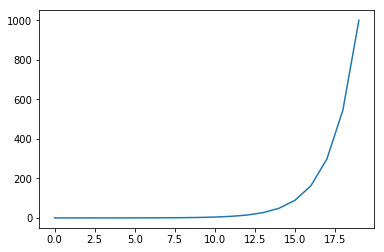

In [25]:
# GAMMA and C configuration
# As per instruction, a logrithmic range was used for gamma: 
# Side note- what is a logrithmic range?
# "Notice an interesting thing about the logarithmic scale: 
# the distance from 1 to 2 is the same as the distance from 2 to 4, or from 4 to 8. 
# In fact any equal multiplication has the same distance: so 1 to 3 is the same as 3 to 9."
# use np.logspace to define logritmic range

#start: the starting value of the sequence.
#stop : the final value of the sequence
#num  : Number of samples to generate. Default is 50.

# "When determining 'good' values , it is important to search on the right scale. We therefore fix default values for C and σ 

C_range = np.geomspace(.01, 1000, 20)
gamma_range = np.geomspace(.00001, 1000, 20)

param_grid = dict(gamma=gamma_range, C=C_range)

print("C_range is", C_range)
print("gamma range is", gamma_range)
plt.plot(C_range)

In [36]:
# -----Apply cross-validation to evaluate different combinations of values of the model parameters----
# INITIALISE THE CROSS_VALIDATIOR
# StratifiedShuffleSplit is a built in Python cross-validator that provides train/test indices on which to split data in train/test sets.
# This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified
# randomized folds. The folds are made by preserving the percentage of samples for each class.
# Note: like the ShuffleSplit strategy, stratified random splits do not guarantee that all folds will be different,
# although this is still very likely for sizeable datasets.

#split data into testing sets --5 sets of 1/3
cross_validate = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=20)
print("cross_validate is ", cross_validate)

cross_validate is  StratifiedShuffleSplit(n_splits=5, random_state=20, test_size=0.3,
            train_size=None)


In [37]:
# GridSearchCV is a "grid-search" on C and γ using cross-validation.
# Various pairs of (C,γ) values are tried and the one with the best cross-validation accuracy are returned.
# one of the input paramaters is our C and gamma range, these ranges will be used.
# σ is for the RBF kernel and C for the SVM. 
# THIS SECTION OF CODE TAKES 10s or so to run. 

#build the SVM algorithm
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cross_validate, verbose=10)
#train the results
grid.fit(x, y)
#print(grid)
print("The best parameters", (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .... C=0.01, gamma=1e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .... C=0.01, gamma=1e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .... C=0.01, gamma=1e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .... C=0.01, gamma=1e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .... C=0.01, gamma=1e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=2.6366508987303556e-05 ............................
[CV]  C=0.01, gamma=2.6366508987303556e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=2.6366508987303556e-05 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.01, gamma=2.6366508987303556e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=2.6366508987303556e-05 ............................
[CV]  C=0.01, gamma=2.6366508987303556e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=6.951927961775606e-05 .............................
[CV]  C=0.01, gamma=6.951927961775606e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=6.951927961775606e-05 .............................
[CV]  C=0.01, gamma=6.951927961775606e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=6.951927961775606e-05 .............................
[CV]  C=0.01, gamma=6.951927961775606e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=6.951927961775606e-05 .............................
[CV]  C=0.01, gamma=6.951927961775606e-05, score=0.6493506493506493, total=   0.0s
[CV] C=0.01, gamma=6.951927961775606e-05 .............................
[CV]  C=0.01, gamma=6.951927961775606e-05, score=0.6493506493506493, total

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   54.9s finished


In [38]:
#train the SVM on the entire dataset and report the total classification error. 
#Accuracy is the percentage of testing data classified corrrectly

rbf_svc = SVC(kernel='rbf', C=3.4622776601683795, gamma= 7.96812920690579616)
rbf_svc.fit(x, y)
Y_pred = rbf_svc.predict(x)
accuracy = accuracy_score(y,Y_pred)*100
print(accuracy)

98.95833333333334


In [39]:
# Utility function to move the midpoint of a colormap to be around values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

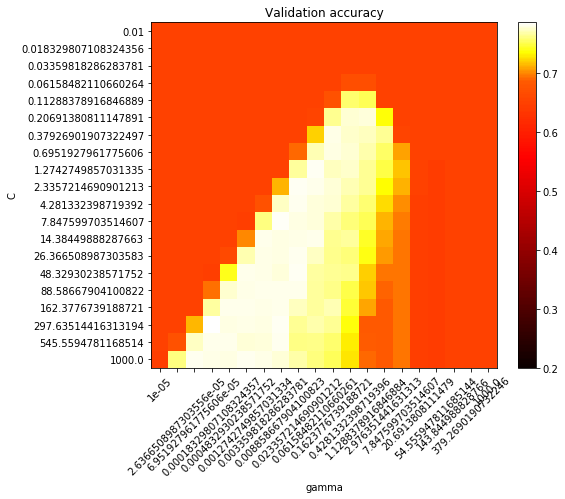

In [40]:
# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
mean = scores.mean()
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=mean))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

#Theory


How sensitive is the cross-validation error to changes in C and γ? 


#we should see that a high gamma value means there is prioritization of points close to the decision boundary and can therefore drag the decision boundary to include them. There will be a higher number and priority of including correct points however the model may generalize badly. A low gamma value will define a longer "reach" and take points further away from the potential decision boundary area into account when drawing the line and produce a smoother decision boundary. 

The C value decides the drawing of the decision boundary itself and how much a smooth decision line or correctly fitting the points is prioritized in creating the SVM. 


The parameters to minimise the cross validation error are {'C': 0.206, 'gamma': 0.428} with a score of 0.77

The Accuracy for entire data set using the params: 78.5%, therefor the the classification error is 22.5%

The cross validation error is quite sensitive to changes in gamma and C:

When gamma is very small, the model is too constrained and cannot capture the complexity(shape) of the data. The region of influence of any selected support vector would include the whole training set.

When gamma gets too large, the radius of the area of influence of the support vectors only includes the support vector itself and C has no effect on the overfitting.

For some values of Gamma the preformance is similar when C is either very small or very large although a lower value of C might be better choice from computational perspective.

Good models can be found on a diagonal of C and gamma. Smooth models (lower gamma values) can be made more complex by increasing the importance of classifying each point correctly (larger C values) so there is a diagonal of good c and gamma values.